In [38]:
import pandas as pd

df = pd.read_csv(
    'data\AirQualityUCI.csv',
    sep=';',
    decimal=',',
)
df.head().iloc[:,11:17]
df1=df.copy()

In [39]:
import numpy as np
df = df.drop(columns=["Unnamed: 15", "Unnamed: 16", "Date", "Time"])
df.replace(-200.0, np.nan, inplace=True)
df = df[:-114]

In [40]:
df=df.dropna()

# PT08.S3(NOx)

In [41]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

In [42]:
arr = df['PT08.S3(NOx)']

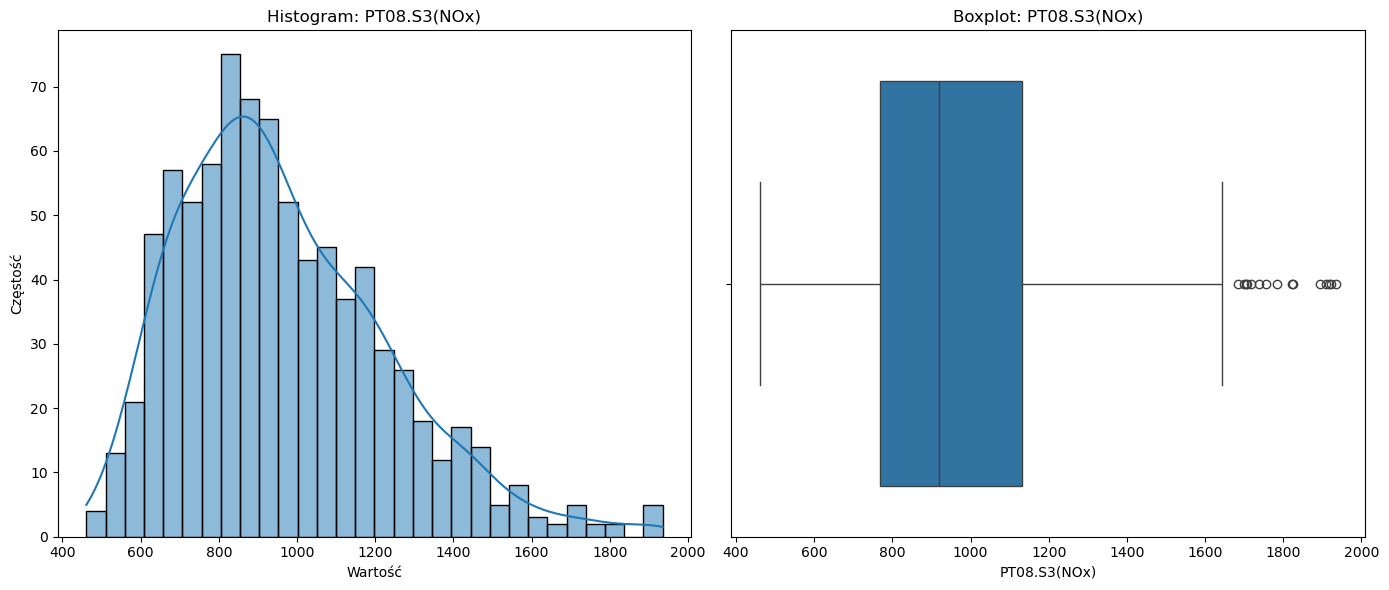

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr, kde=True, bins=30)
plt.title("Histogram: PT08.S3(NOx)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr)
plt.title("Boxplot: PT08.S3(NOx)")
plt.xlabel("PT08.S3(NOx)")

plt.tight_layout()
plt.show()

### Histogram

* **Kształt rozkładu:** wyraźny szczyt (moda) w okolicach 800–1 000, a dalej gwałtowny spadek częstości — większość odczytów mieści się między \~500 a \~1 400.
* **Skośność:** rozkład przesunięty w prawo (pojedyncze sporadyczne, wysokie odczyty NOx powodują długi ogon).
* **Gęstość:** dolne wartości (< 500) i bardzo wysokie (> 1 500) zdarzają się rzadko.

### Boxplot

* **Mediana (linia wewnątrz pudełka):** wynosi 920 , co oznacza, że połowa wszystkich odczytów jest mniejsza niż ta wartość.
* **Wartości w przedziale między 25% (769) a 75% (1131)** stanowią większość danych (IQR – interquartile range).  
* **Wartości odstające (outliers):** liczne punkty poza wąsami po prawej stronie – świadczą o sporadycznych skokowych wzrostach odczytu NOx, które mogą być spowodowane np. nagłą zmianą warunków atmosferycznych.


# NO2(GT)

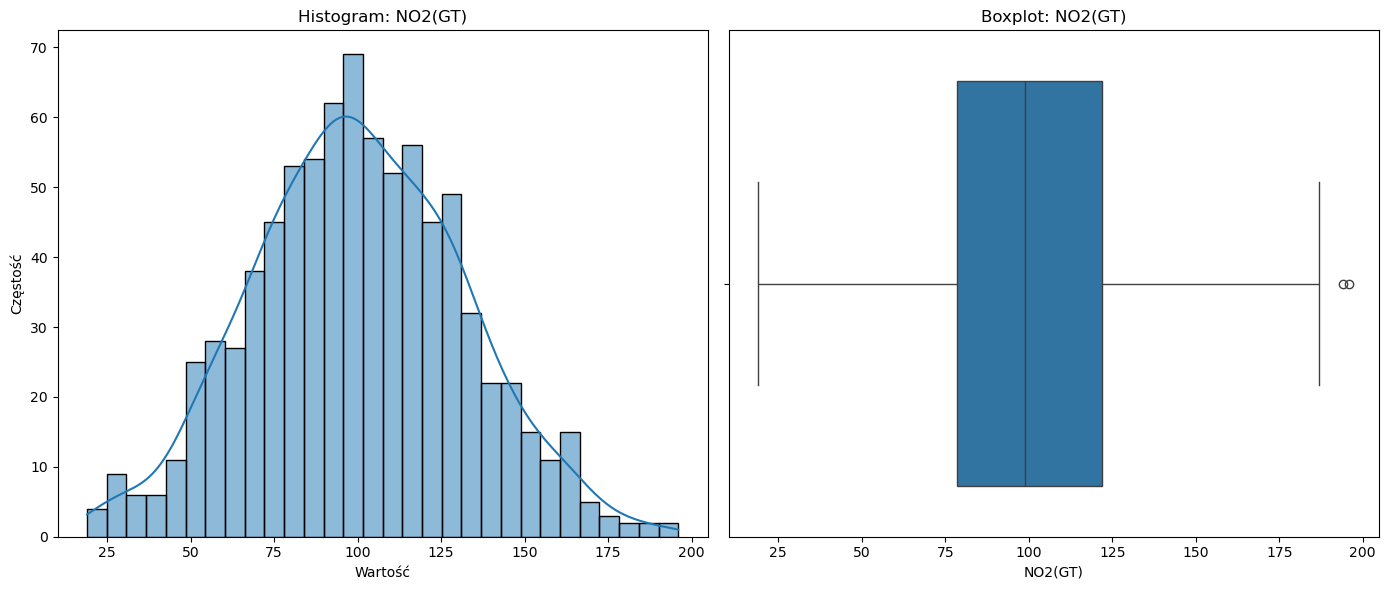

In [44]:
arr1 = df['NO2(GT)']
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: NO2(GT)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: NO2(GT)")
plt.xlabel("NO2(GT)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **NO2(GT)**

### Histogram: NO2(GT)
- **Kształt rozkładu**  
  Rozkład jest lekko prawoskośny, z większością obserwacji skupionych pomiędzy 60 a 140.  
- **Modalna wartość**  
  Najwięcej godzinnych odczytów wypada około 90–110.  
- **Rozkładu**  
  Rozkład obserwacji przypomina rozkład normalny.  
- **Gęstość i rozrzut**  
  Dolne wartości (< 30 ) oraz bardzo wysokie (> 200) są rzadkie.

### Boxplot: NO2(GT)
* **Mediana** wynosi 99, co oznacza, że połowa pomiarów ma stężenie benzenu poniżej tej wartości.  
* **Wartości w przedziale między 25% (78) a 75% (122)** stanowią większość danych (IQR – interquartile range).    
* **Wartości odstające** liczne punkty powyżej górnego wąsa świadczą o kilkunastu skokowych wzrostach stężenia NO₂.



# C6H6(GT)

In [45]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

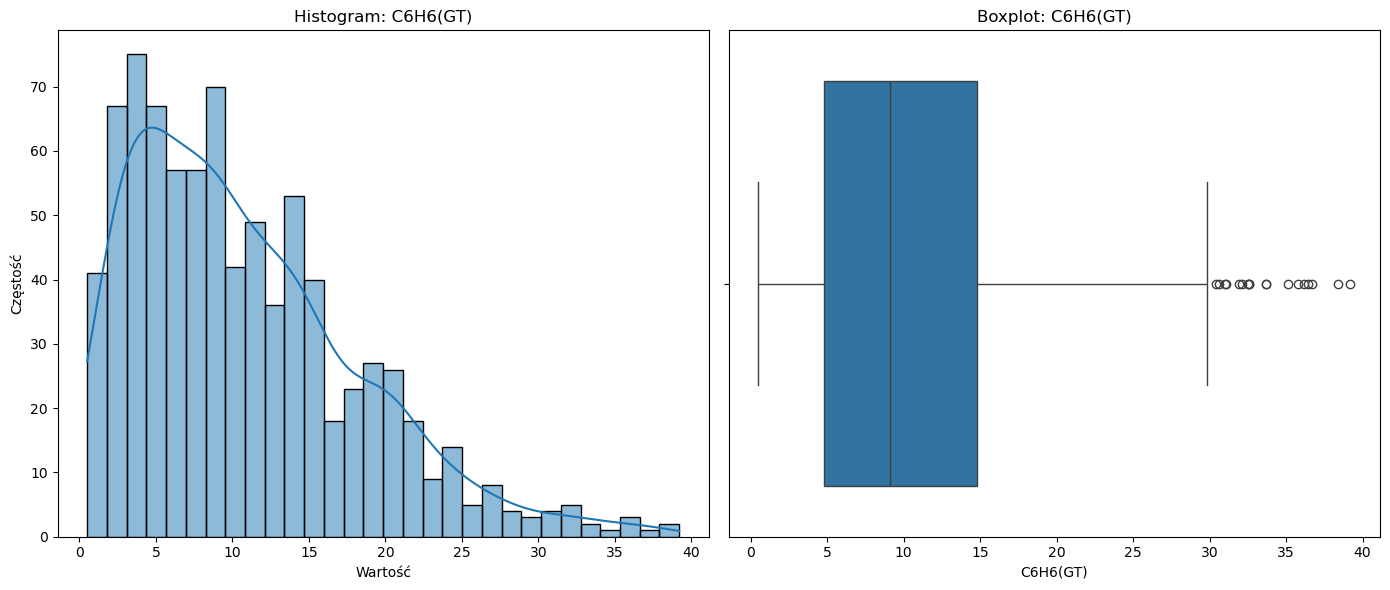

In [46]:
arr2 = df['C6H6(GT)']
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr2, kde=True, bins=30)
plt.title("Histogram: C6H6(GT)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr2)
plt.title("Boxplot: C6H6(GT)")
plt.xlabel("C6H6(GT)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **C6H6(GT)**

### Histogram: C6H6(GT)
- **Kształt rozkładu**  
  Wyraźnie prawoskośny rozkład – większość wartości skupia się przy niskich stężeniach benzenu, natomiast sporadyczne obserwacje o wysokich wartościach tworzą długi prawy ogon.
- **Modalna wartość**  
  Najwięcej odczytów wypada w okolicach 4–8.
- **Ogon rozkładu**  
  Stężenia powyżej ~25 są rzadkie, ale sięgają nawet do 40.

### Boxplot: C6H6(GT)
* **Mediana** wynosi 9.1, co oznacza, że połowa pomiarów ma stężenie benzenu poniżej tej wartości.
* **Wartości w przedziale między 25% (4.8) a 75% (14.8)** stanowią większość danych (IQR – interquartile range).
* **Wartości odstające**  Liczne punkty powyżej górnego wąsa wskazują na sporadyczne epizody podwyższonego stężenia benzenu, które mogą wynikać z lokalnych zdarzeń (np. wzmożony ruch samochodowy, prace remontowe, itp.).


# CO(GT)

In [47]:
arr1 = df['CO(GT)']

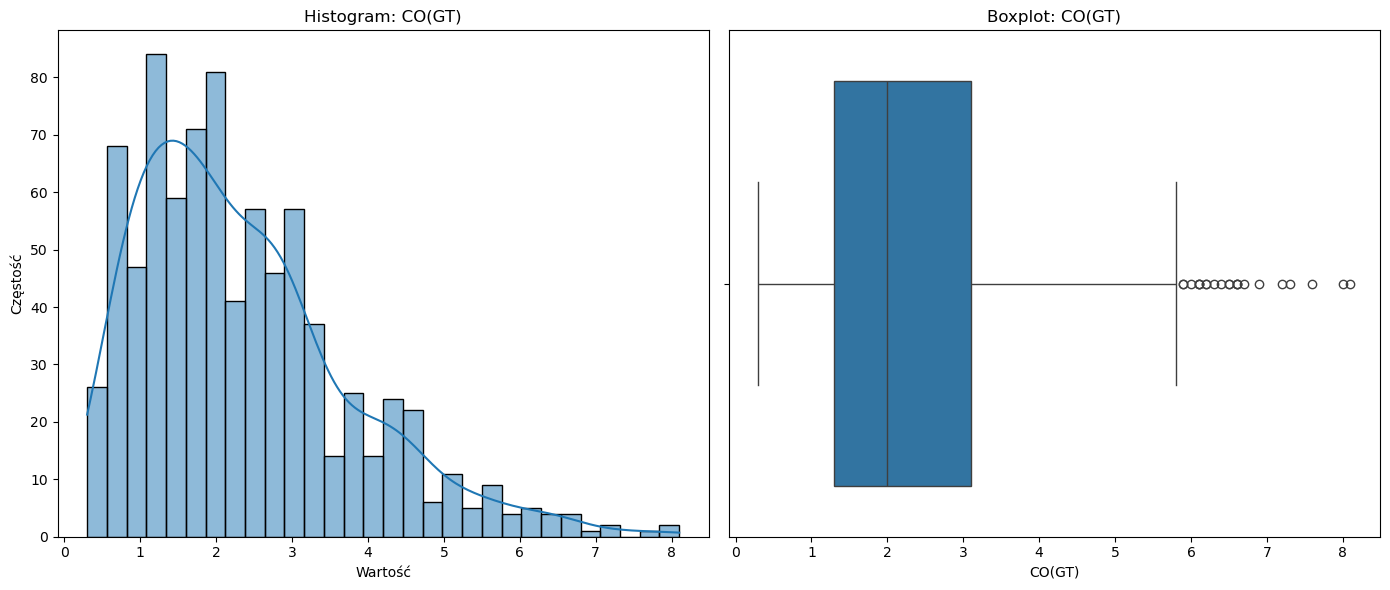

In [48]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: CO(GT)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: CO(GT)")
plt.xlabel("CO(GT)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **CO(GT)**

### Histogram: CO(GT)  
- **Kształt rozkładu**  
  Silnie **prawoskośny rozkład** – ponad 80% danych skupia się w przedziale **0–4**, z częstotliwością sięgającą **70** dla najniższych wartości (1–2).    
  **Ogon rozkładu**: Długi, rozciągający się do **8**, ale wartości powyżej **5** występują rzadko (częstotliwość spada do 10).  
- **Dominujący zakres**  
  Wartości **1–3** dominują, co sugeruje, że większość pomiarów rejestruje **bardzo niskie stężenia CO**.  
- **Implikacje**  
  Niskie średnie stężenie CO może wskazywać na ogólnie dobrą jakość powietrza, ale nie eliminuje ryzyka krótkotrwałych skoków.  

### Boxplot: CO(GT)  
- **Mediana**  
  Wynosi ok. **2** – połowa pomiarów nie przekracza tego poziomu.  
- **Rozstęp międzykwartylowy (IQR)**  
  Przedział **25–75%** prawdopodobnie obejmuje wartości **1.3–3.1**, co potwierdza koncentrację danych przy dolnych wartościach.  
- **Wartości odstające**  
  Punkty powyżej **6–8** wskazują na **incydentalne skoki stężenia CO**. Mogą wynikać np. z **Błędów pomiarowych** (wymagają weryfikacji). 


# NMHC(GT)

In [49]:
arr1 = df['NMHC(GT)']

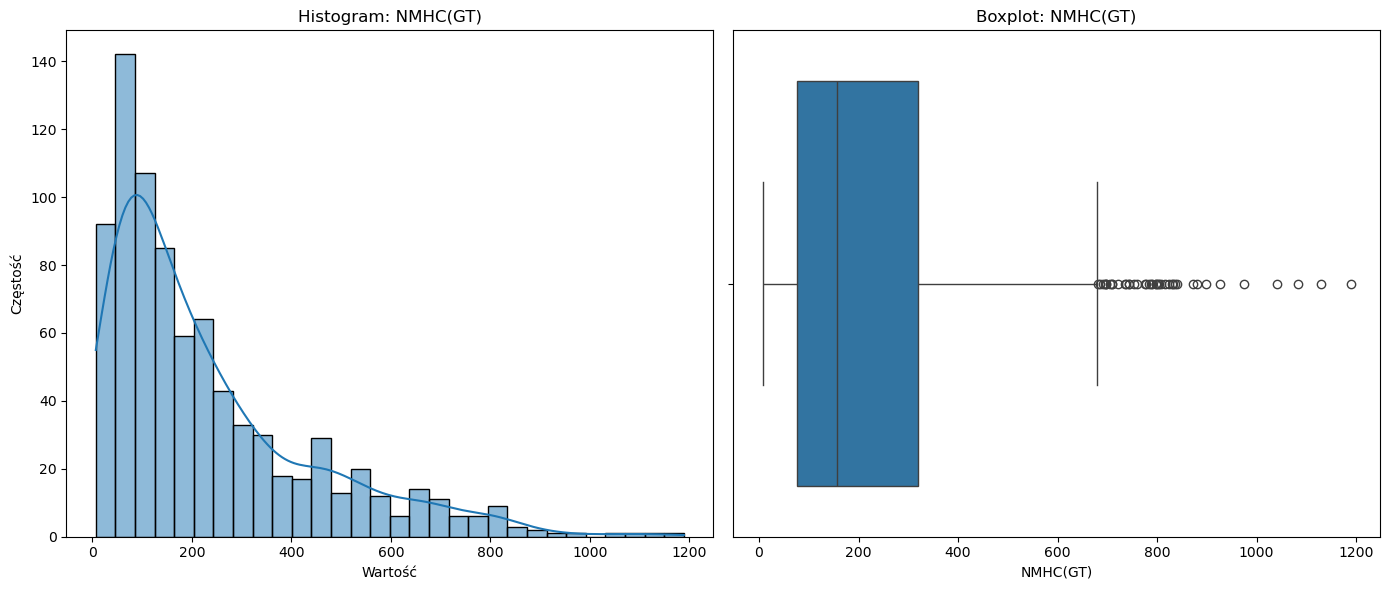

In [50]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: NMHC(GT)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: NMHC(GT)")
plt.xlabel("NMHC(GT)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **NMHC(GT)** (węglowodory niemetanowe)

### Histogram: NMHC(GT)  
- **Kształt rozkładu**:  
  - **Prawoskośność** – większość danych skupia się w niższych zakresach (0–200), z długim ogonem sięgającym **1200**.  
  - **Maksymalna częstotliwość**: Wartości w przedziale **50–150** osiągają najwyższą częstotliwość, co wskazuje na dominację umiarkowanych stężeń.  
  - **Rzadkie wysokie wartości**: Powyżej **800** częstotliwość gwałtownie spada, ale ekstremalne pomiary (do **1200**) sugerują incydentalne emisje.    

### Boxplot: NMHC(GT)  
- **Statystyki opisowe**:  
  - **Mediana**: Wynosi **157** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **77–318.5** obejmuje 50% danych, co wskazuje na umiarkowaną zmienność.  
  - **Wartości odstające**: Punkty powyżej **700** (sięgające **1200**) – mogą być związane z awariami przemysłowymi, intensywnym ruchem drogowym lub spalaniem odpadów.  
- **Implikacje środowiskowe**:  
  - NMHC są prekursorami ozonu przygruntowego – nawet średnie stężenia wymagają monitorowania.  
  - Skrajne wartości (>1000) mogą wskazywać na lokalne źródła zanieczyszczeń, np. rafinerie lub magazyny paliw.  

# PT08.S2(NMHC)

In [51]:
arr1 = df['PT08.S2(NMHC)']

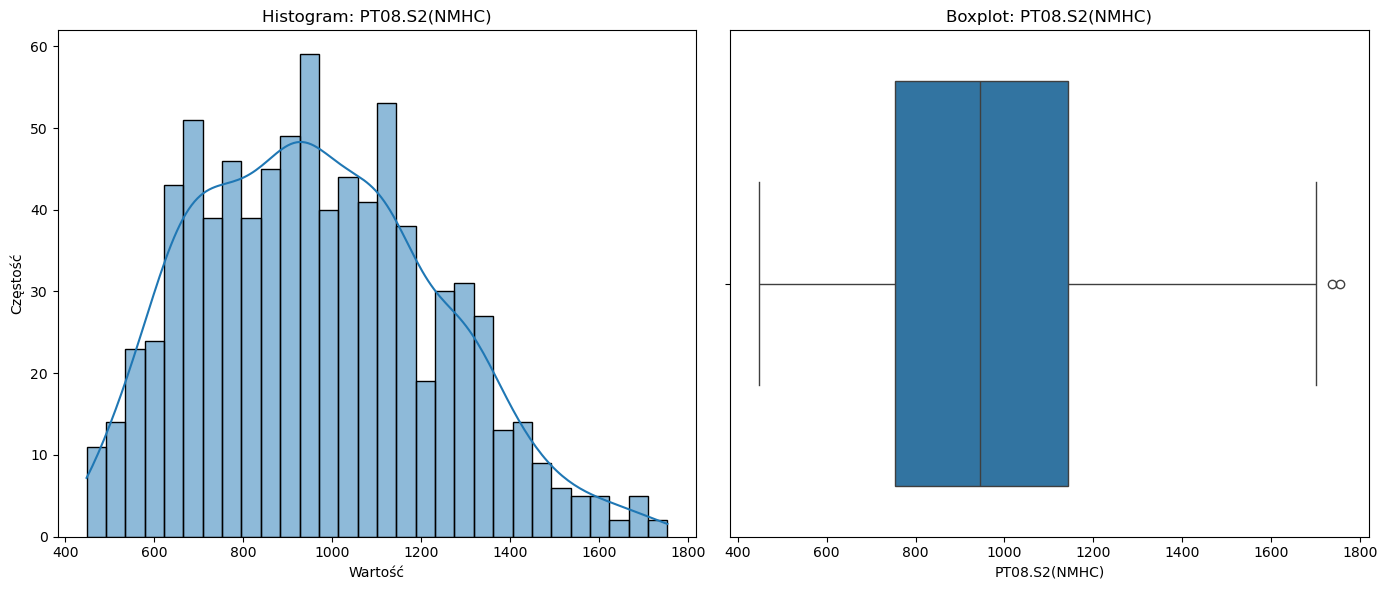

In [52]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: PT08.S2(NMHC)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: PT08.S2(NMHC)")
plt.xlabel("PT08.S2(NMHC)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **PT08.S2(NMHC)** (prawdopodobnie pomiar czujnika NMHC)

### Histogram: PT08.S2(NMHC)  
- **Kształt rozkładu**:  
  - **Silna prawoskośność** – większość danych skupia się w przedziale **800–1100**, z maksymalną częstotliwością ok. **50** dla wartości ok. **950**.  
  - **Ogon rozkładu**: Długi, rozciągający się do **1700**, ale powyżej **1600** częstotliwość spada prawie do zera.  
- **Dominujący zakres**:  
  - Ponad 70% pomiarów mieści się w przedziale **500–1400**, co sugeruje stabilne warunki pomiarowe dla większości czasu.  
- **Anomalie**:  
  - Brak danych poniżej **448** – może wynikać z zakresu czułości czujnika lub braku emisji w niższych wartościach.  

### Boxplot: PT08.S2(NMHC)  
- **Statystyki opisowe**:  
  - **Mediana**: Szacowana na **944** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **754–1142.5** obejmuje 50% centralnych danych, co wskazuje na umiarkowaną zmienność.  
  - **Wartości odstające**: Punkty powyżej **1700** – mogą wynikać z **Chwilowych zakłóceń** (np. błędy czujnika, kurz).

# PT08.S1(CO)

In [53]:
arr1 = df['PT08.S1(CO)']

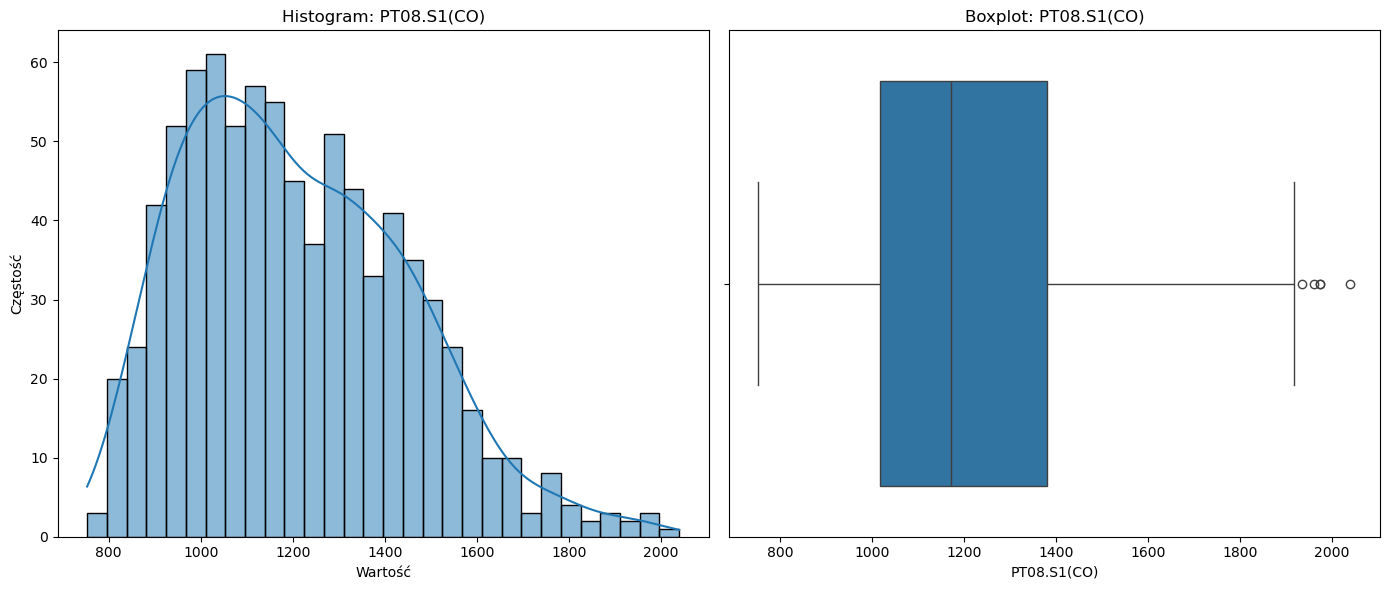

In [54]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: PT08.S1(CO)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: PT08.S1(CO)")
plt.xlabel("PT08.S1(CO)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **PT08.S1(CO)** (pomiar czujnika CO)

### Histogram: PT08.S1(CO)  
- **Kształt rozkładu**:  
  - **Lewoskośność** – najwyższa częstotliwość (**55**) występuje dla wartości (ok. **1100**), a następnie maleje wraz ze wzrostem stężenia CO.  
  - **Brak danych powyżej 2040 oraz poniżej 753** – zakres pomiarowy czujnika lub rzeczywisty brak stężeń.  
- **Dominujący zakres**:  
  - Ponad 70% danych skupia się w przedziale **900–1100**, co wskazuje na przewagę niskich i umiarkowanych stężeń CO.  
- **Anomalie**:  
  - Etykieta "Crystoid" (prawdopodobnie błąd dla "Częstość") sugeruje problem z formatowaniem osi Y.  

### Boxplot: PT08.S1(CO)  
- **Statystyki opisowe**:  
  - **Mediana**: Wynosi **1172** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **1017–1380** obejmuje 50% centralnych danych, co wskazuje na umiarkowaną zmienność.  
  - **Wartości odstające**: Punkty powyżej **1900** – mogą wynikać z **Krótkotrwałych emisji** (np. korki drogowe, awarie systemów wentylacyjnych).   


# NOx(GT)

In [55]:
arr1 = df['NOx(GT)']

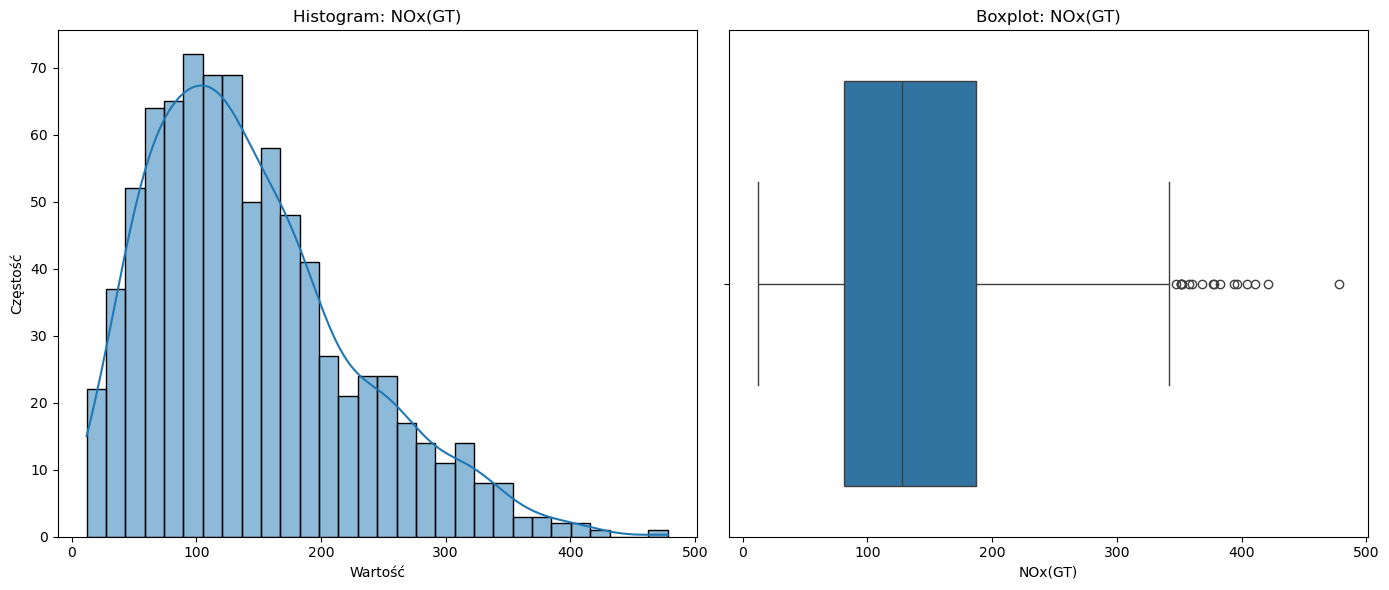

In [56]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: NOx(GT)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: NOx(GT)")
plt.xlabel("NOx(GT)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **NOx(GT)** (tlenki azotu)

### Histogram: NOx(GT)  
- **Kształt rozkładu**:  
  - **Silna prawoskośność** – większość danych koncentruje się w przedziale **0–400**, z maksymalną częstotliwością ok. **67** dla wartości ok. **110**.  
  - **Ogon rozkładu**: Długi, rozciągający się do **500**, ale wartości powyżej **300** występują rzadko (częstotliwość spada prawie do zera).  
- **Dominujący zakres**:  
  - Ponad **80% pomiarów** mieści się w przedziale **0–300**, co wskazuje na przewagę niskich i umiarkowanych stężeń NOx.  
- **Anomalie**:  
  - Brak danych powyżej **478** – może wynikać z ograniczeń czujnika lub braku ekstremalnych emisji.  

### Boxplot: NOx(GT)  
- **Statystyki opisowe**:  
  - **Mediana**: Wynosi **128** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **81–187** obejmuje 50% centralnych danych, co sugeruje umiarkowaną zmienność.  
  - **Wartości odstające**: Punkty powyżej **350** (sięgające **500**) – mogą być związane z **Intensywnym ruchem drogowym** (szczególnie w godzinach szczytu).  
- **Implikacje środowiskowe**:  
  - NOx są kluczowe dla powstawania smogu i kwaśnych deszczów – nawet średnie stężenia wymagają monitorowania.  

# PT08.S4(NO2)

In [57]:
arr1 = df['PT08.S4(NO2)']

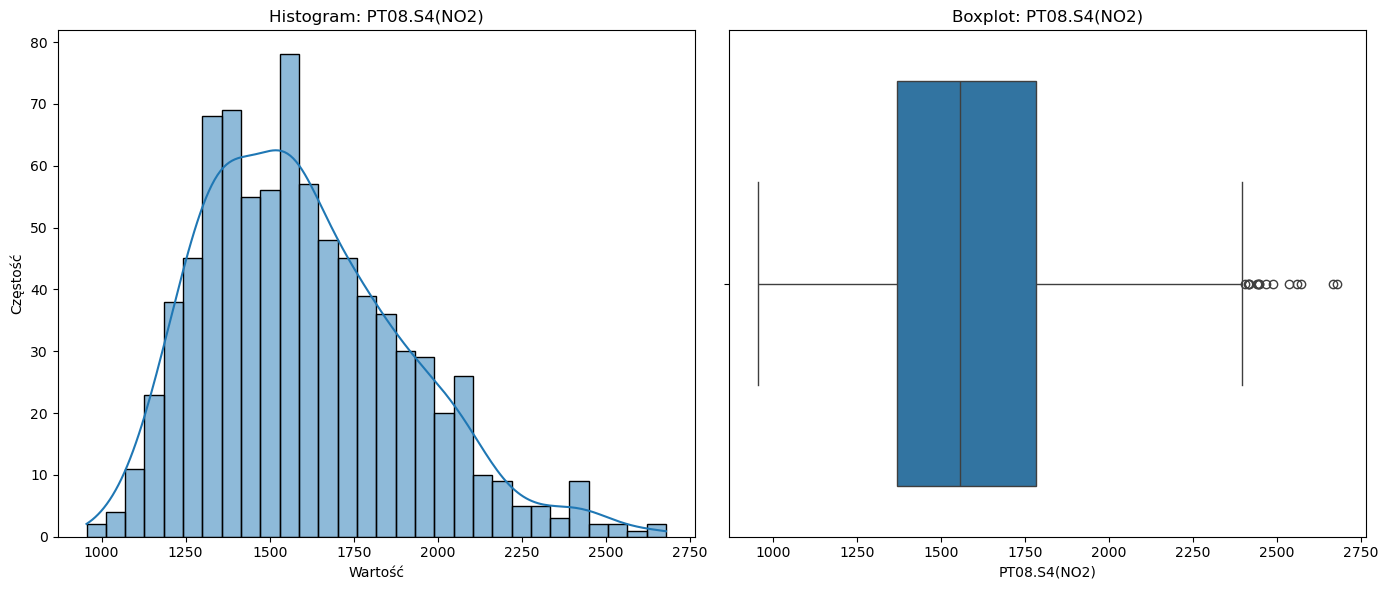

In [58]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: PT08.S4(NO2)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: PT08.S4(NO2)")
plt.xlabel("PT08.S4(NO2)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **PT08.S4(NO2)** (pomiar czujnika NO2)

### Histogram: PT08.S4(NO2)  
- **Kształt rozkładu**:  
  - **Silna prawoskośność** – najwyższa częstotliwość ok. (**62**) występuje dla wartości **1250–1650**, po czym gwałtownie spada w kierunku wyższych stężeń.  
  - **Ogon rozkładu**: Cienki, rozciągający się do **2700**, ale wartości powyżej **2100** są rzadkie (częstotliwość spada do poniżej 10).  
- **Dominujący zakres**:  
  - Ponad **70% danych** skupia się w przedziale **110–2100**, co wskazuje na przewagę **średnich stężeń NO2** w badanym okresie.  
- **Anomalie**:  
  - Brak danych poniżej **955** – może wynikać z dolnego progu czułości czujnika lub braku emisji w niższych zakresach.  

### Boxplot: PT08.S4(NO2)  
- **Statystyki opisowe**:  
  - **Mediana**: Wynosi **1556** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **1369–1785** obejmuje 50% centralnych danych, co sugeruje **znaczną zmienność**.  
  - **Wartości odstające**: Punkty powyżej **2400** (sięgające **2700**) – mogą być związane z **Emisjami przemysłowymi** (np. spalanie paliw stałych).   
- **Implikacje środowiskowe**:  
  - NO2 jest kluczowy dla powstawania **smogu** i negatywnego wpływu na drogi oddechowe – skrajne wartości (>2400) wymagają natychmiastowej interwencji.  

# PT08.S5(O3)

In [59]:
arr1 = df['PT08.S5(O3)']

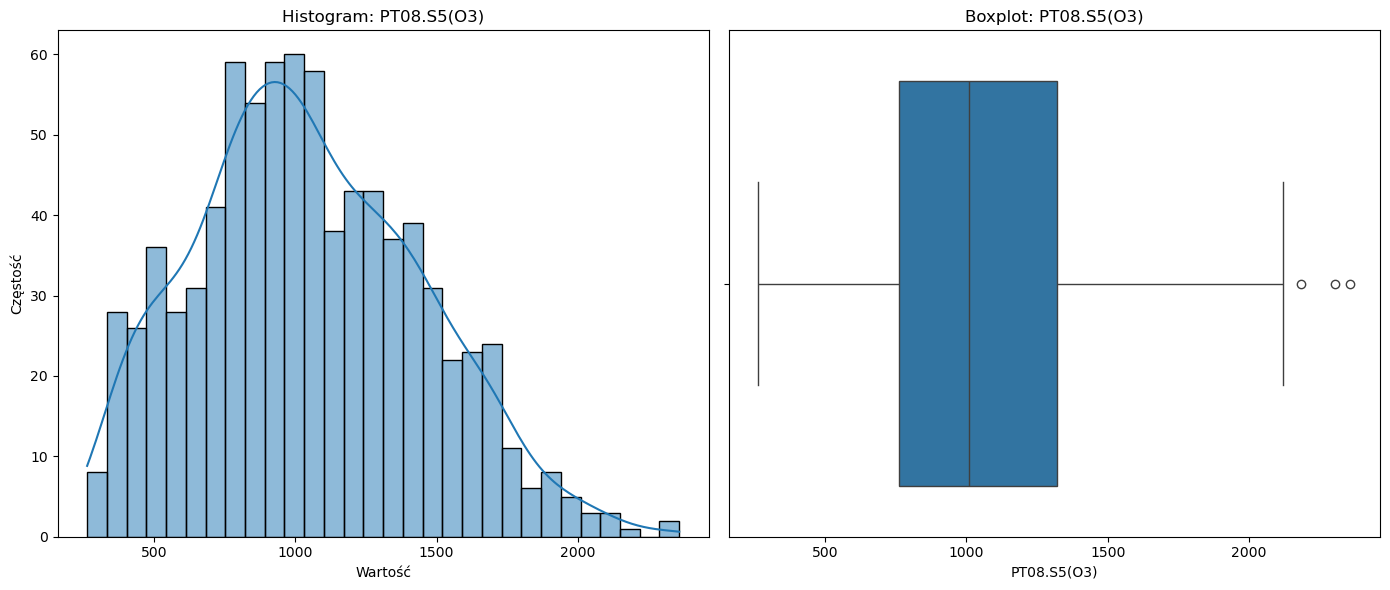

In [60]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: PT08.S5(O3)")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: PT08.S5(O3)")
plt.xlabel("PT08.S5(O3)")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **PT08.55(O3)** (pomiar ozonu)

### Histogram: PT08.55(O3)  
- **Kształt rozkładu**:  
  - **Silna prawoskośność** – większość danych skupia się w przedziale **500–1000**, z maksymalną częstotliwością dla wartości ok. **60**.  
  - **Ogon rozkładu**: Długi, rozciągający się do **2359**, ale wartości powyżej **1900** występują rzadko.  
- **Dominujący zakres**:  
  - Ponad **60% pomiarów** mieści się w przedziale **500–1500**, co sugeruje przewagę **nisko-średnich stężeń ozonu**.  
- **Anomalie**:  
  - Brak danych poniżej **263** – może wynikać z dolnego progu czułości czujnika lub rzeczywistego braku emisji.  

### Boxplot: PT08.55(O3)  
- **Statystyki opisowe**:  
  - **Mediana**: Szacowana na **~1009** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **760–1320** obejmuje 50% danych, co wskazuje na **znaczną zmienność**.  
  - **Wartości odstające**: Punkty powyżej **2100** – mogą być związane z **Epizodami fotochemicznymi** (np. upalne dni z wysokim nasłonecznieniem).
   
  **Implikacje środowiskowe**:  
  - Wysokie stężenia O3 są szkodliwe dla zdrowia i ekosystemów – wymagają alertów jakości powietrza.  

# AH

In [61]:
arr1 = df['AH']

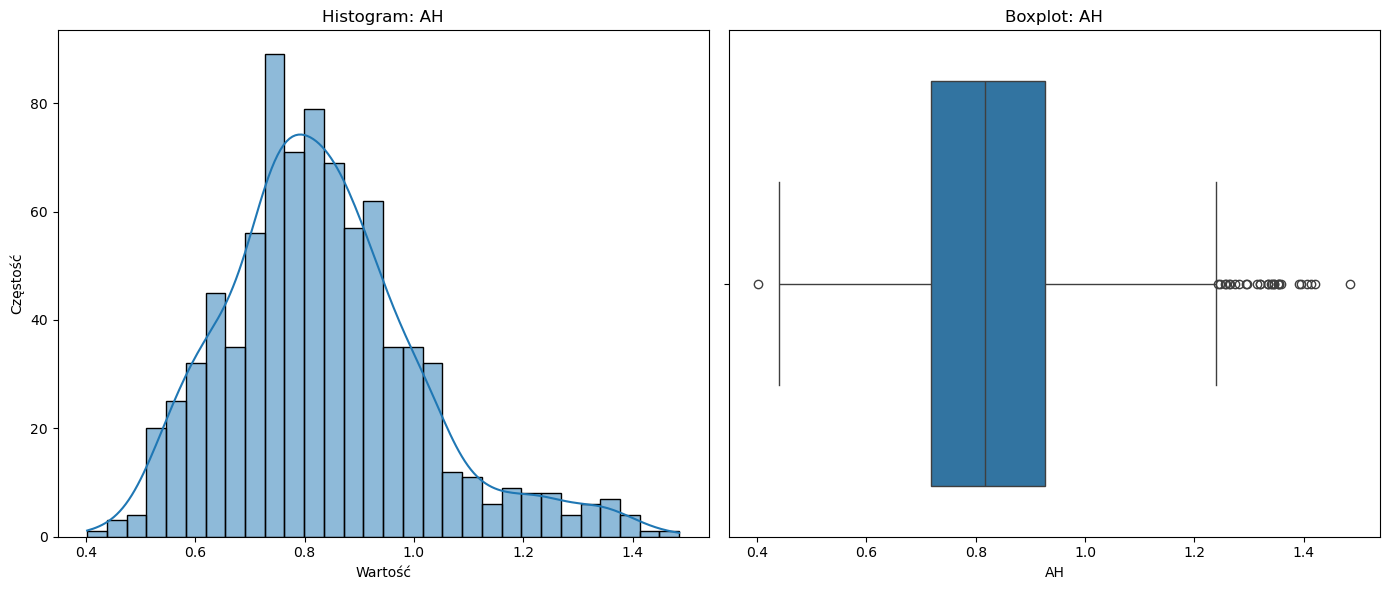

In [62]:

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: AH")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: AH")
plt.xlabel("AH")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **AH** (wilgotność bezwzględna)

### Histogram: AH  
- **Kształt rozkładu**:  
  - **Silna prawoskośność** – większość danych skupia się w przedziale **0.75–0.9**, z maksymalną częstotliwością ok. **70** dla wartości **0.8**.  
  - **Ogon rozkładu**: Krótki, rozciągający się do ok. **1.5**, ale wartości powyżej **1.1** występują bardzo rzadko (częstotliwość spada  prawie do 0).  
- **Dominujący zakres**:  
  - Ponad **90% pomiarów** mieści się w przedziale **0.7–1.1**, co wskazuje na przewagę **niskiej i umiarkowanej wilgotności**.  
- **Anomalie**:  
  - Brak danych poniżej **0.4** – może wynikać z warunków środowiskowych lub ograniczeń czujnika.  

### Boxplot: AH  
- **Statystyki opisowe**:  
  - **Mediana**: Wynosi **~0.82** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **0.72–0.93** obejmuje 50% danych, co potwierdza koncentrację pomiarów w dolnych zakresach.  
  - **Wartości odstające**: Punkty powyżej **1.2** – mogą być związane z **Epizodami pogodowymi** (np. deszczowe dni).  
- **Implikacje**:  
  - Niska wilgotność bezwzględna dominuje w danych, co może wynikać z suchych warunków pomiarowych lub sezonowości (np. pomiary zimą).  

# T

In [63]:
arr1 = df['T']

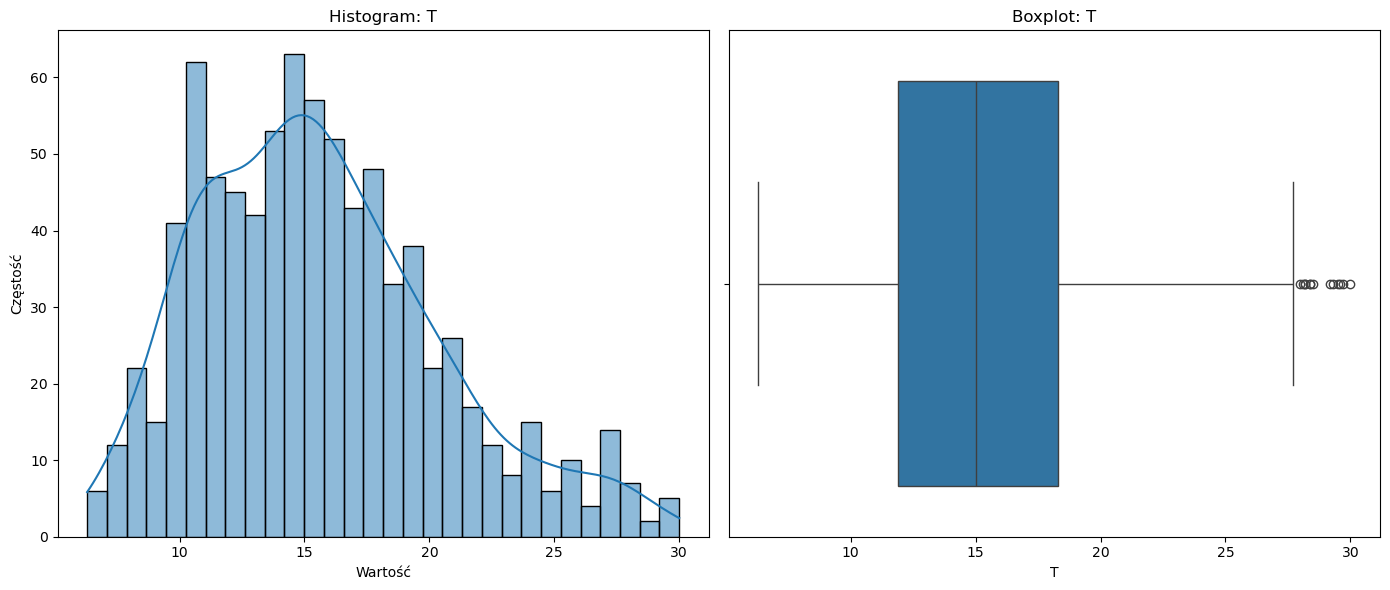

In [64]:

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: T")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: T")
plt.xlabel("T")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **T** (temperatura)

### Histogram: T  
- **Kształt rozkładu**:  
  - **Prawoskośność** – większość danych skupia się w przedziale **0–30**, z maksymalną częstotliwością ok. **55** dla najniższych wartości (ok. **15**).  
  - **Ogon rozkładu**: Rozciąga się do **30**, ale wartości powyżej **25** występują rzadko (częstotliwość spada do **10**).  
- **Dominujący zakres**:  
  - Ponad **80% pomiarów** mieści się w przedziale **7–20**, co sugeruje przewagę **nisko-średnich temperatur** w badanym okresie.   

### Boxplot: T  
- **Statystyki opisowe**:  
  - **Mediana**: Wynosi **15** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **11.9–18.3** obejmuje 50% danych, co wskazuje na **umiarkowaną zmienność**.  
  - **Wartości odstające**: Punkty powyżej **27** – mogą być związane z **Epizodami pogodowymi** (np. upalne dni).  
- **Implikacje**:  
  - Dominacja niskich temperatur może wynikać z sezonowości (np. pomiary zimowe) lub lokalnych warunków klimatycznych.  

# RH

In [65]:
arr1 = df['RH']

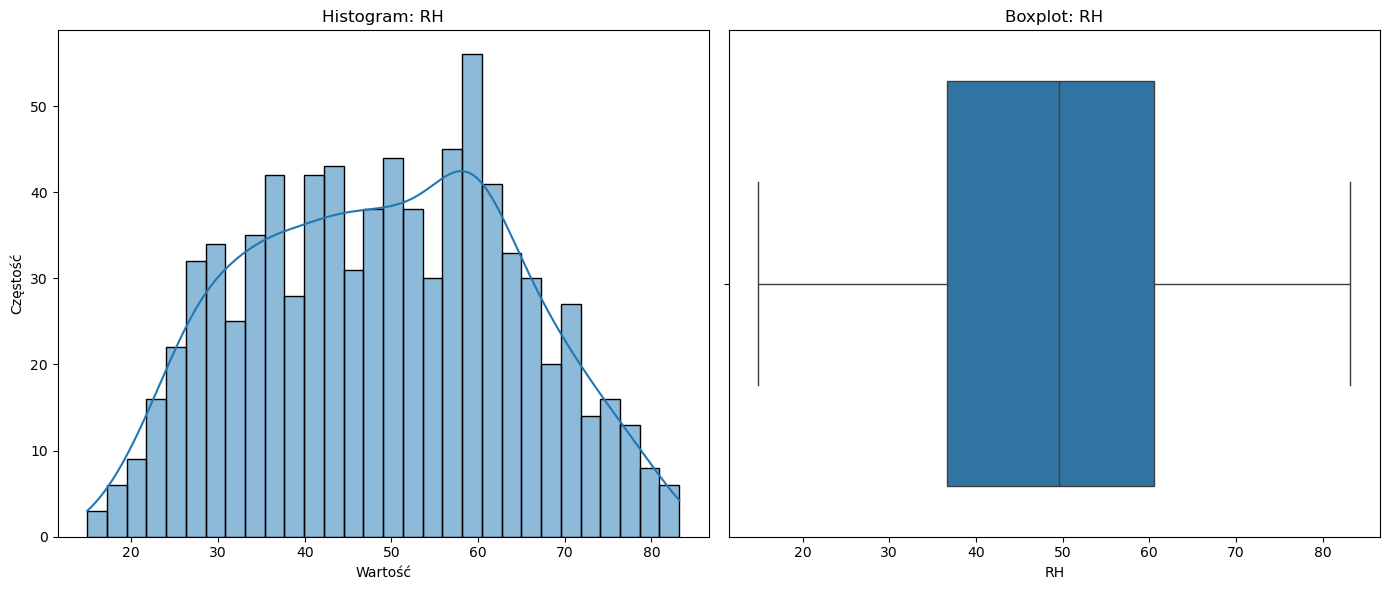

In [66]:

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(arr1, kde=True, bins=30)
plt.title("Histogram: RH")
plt.xlabel("Wartość")
plt.ylabel("Częstość")

plt.subplot(1,2,2)
sns.boxplot(x=arr1)
plt.title("Boxplot: RH")
plt.xlabel("RH")

plt.tight_layout()
plt.show()

## Analiza wykresów dla zmiennej **RH** (wilgotność względna)

### Histogram: RH  
- **Kształt rozkładu**:  
  - **Rozkład prawdopodobnie równomierny** – dane rozłożone w zakresie **15–83**, bez wyraźnej dominacji jednego przedziału.  
  - **Brak skrajnych wartości** – wszystkie pomiary mieszczą się w zakresie **14.9–83.**, co sugeruje stabilne warunki pomiarowe.  
- **Dominujący zakres**:  
  - Najczęściej występują wartości w okolicy **~60**. 

### Boxplot: RH  
- **Statystyki opisowe**:  
  - **Mediana**: Szacowana na **~50** – połowa pomiarów jest niższa od tej wartości.  
  - **Rozstęp międzykwartylowy (IQR)**: Przedział **36.7–60.5** obejmuje 50% danych, co wskazuje na **umiarkowaną zmienność**.  
  - **Wartości odstające**: Brak wyraźnych outlierów – dane skupione w głównym zakresie.  
- **Implikacje**:  
  - Wilgotność względna utrzymuje się w typowym zakresie, co może odpowiadać warunkom mieszanym (np. naprzemienne okresy suche i wilgotne).  

# Mapa cieplna (heatmap)


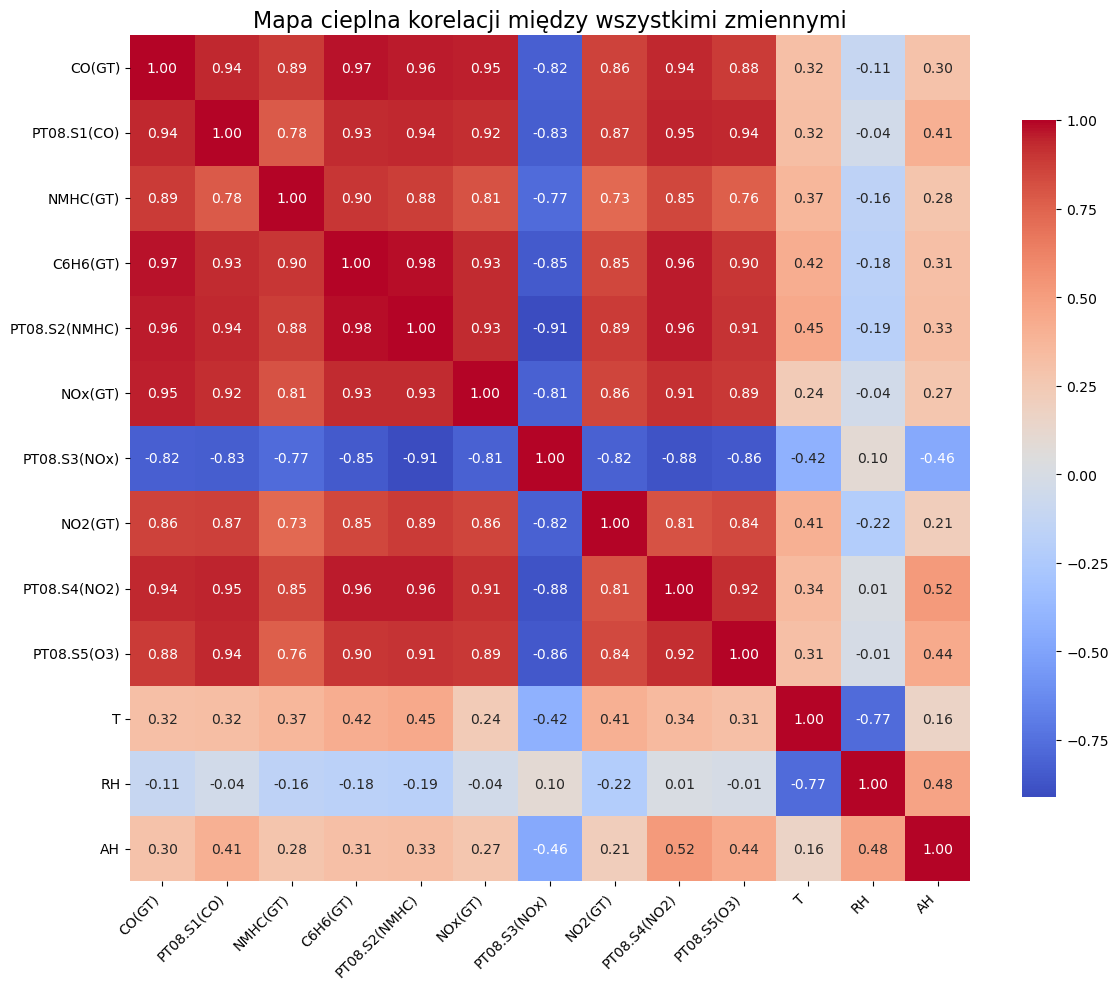

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns


corr = df.corr()


plt.figure(figsize=(12,10))
sns.heatmap(corr, 
            annot=True,        
            fmt=".2f",       
            cmap="coolwarm",   
            cbar_kws={"shrink": .8})
plt.title("Mapa cieplna korelacji między wszystkimi zmiennymi", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Mapa cieplna przedstawiająca współczynniki korelacji Pearsona pomiędzy wszystkimi zmiennymi w zbiorze danych.

##  Kluczowe obserwacje:

1. **Bardzo silne dodatnie korelacje (> 0,9) między czujnikami a odpowiadającymi im gazami oraz między samymi czujnikami**

   * **CO(GT)** vs **PT08.S1(CO)**: r ≈ 0,94
   * **NMHC(GT)** vs **PT08.S2(NMHC)**: r ≈ 0,98
   * **NO₂(GT)** vs **PT08.S4(NO₂)**: r ≈ 0,96
   * **O₃ (PT08.S5)** vs inne sensory: wiele korelacji r ≥ 0,90
   * Czujniki między sobą (np. PT08.S1–PT08.S2, PT08.S2–PT08.S4, itp.) również r ≈ 0,9–0,96

2. **Silna ujemna korelacja czujnika NOₓ (PT08.S3) z większością pozostałych zmiennych**

   * PT08.S3(NOₓ) vs PT08.S2(NMHC): r ≈ –0,91
   * PT08.S3 vs CO(GT), C6H6(GT), NO₂(GT), PT08.S5(O₃): r w granicach –0,82 do –0,88
   * Wyjątek: **PT08.S3 vs RH** – lekko dodatnia (r ≈ 0,10)

3. **Temperatura (T)**

   * Umiarkowanie dodatnio koreluje z większością gazów i sensorów (r ≈ 0,24–0,45), np. T vs PT08.S2(NMHC) r ≈ 0,45.
   * Oznacza to, że wzrost T wiąże się z wyższymi odczytami poszczególnych sensorów (możliwe zmiany w chemii detekcji lub sezonowe źródła emisji).

4. **Wilgotność względna (RH)**

   * Silnie ujemnie koreluje z temperaturą: r ≈ –0,77 (cieplejsze powietrze → niższa RH).
   * Z sensorami i gazami korelacje słabe (r ≈ –0,04 do –0,22), co sugeruje niewielki bezpośredni wpływ RH na odczyty.

5. **Wilgotność absolutna (AH)**

   * Umiarkowanie dodatnio koreluje z temperaturą (r ≈ 0,16) i czujnikami (r ≈ 0,27–0,52), np. AH vs PT08.S4(NO₂) r ≈ 0,52.
   * Wskazuje to, że większa ilość pary wodnej w powietrzu nieco zwiększa sygnały sensorów.

---

**Podsumowując:**

* Dane wykazują niemal idealne sprzężenie czujników z odpowiadającymi im gazami oraz ze sobą nawzajem (r \~0,9–1,0).
* Czujnik PT08.S3 (NOₓ) zachowuje się odwrotnie – jego odczyty silnie ujemnie korelują z większością innych zmiennych.
* Meteorologia: temperatura sprzyja wyższym odczytom sensorów, wilgotność względna wręcz przeciwnie, a absolutna ma efekt umiarkowanie dodatni.


# Macierz wykresów punktowych (scatter matrix)

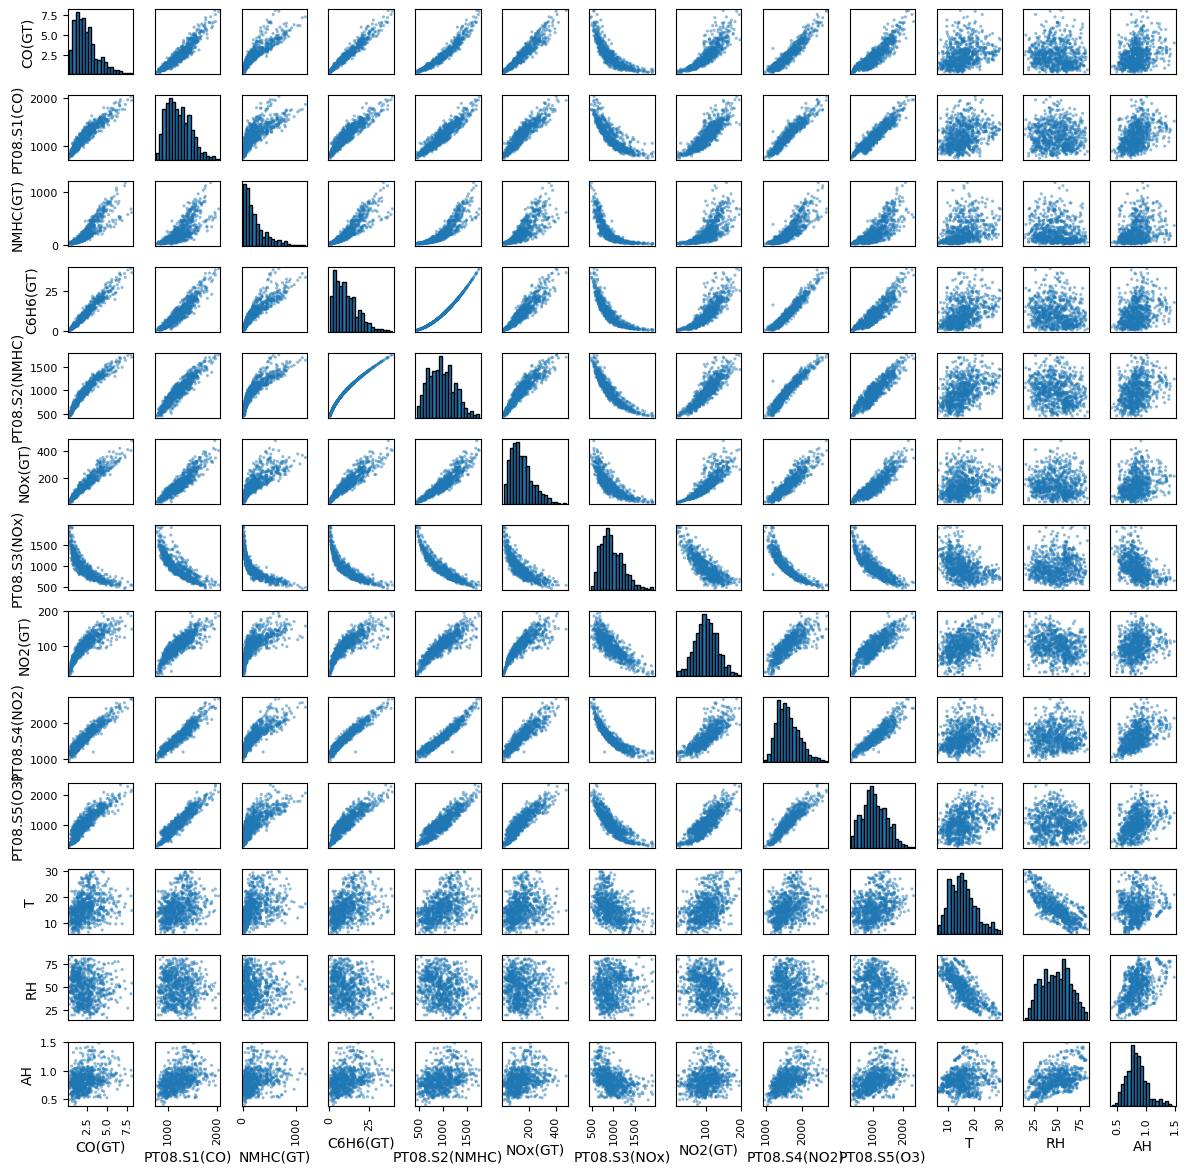

In [68]:

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt


scatter_matrix(df, 
               alpha=0.5, 
               diagonal='hist',
               figsize=(12,12),
               s=20,            
               hist_kwds={'bins': 20, 'edgecolor':'k'})
plt.suptitle("", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


## Macierz rozrzutu łączy w sobie w jednym wykresie dwie informacje:

### 1. Przekątne (histogramy)

* **Gazowe zmienne** (CO(GT), NMHC(GT), C6H6(GT), NOx(GT), NO2(GT)): wszystkie mają prawoskośne rozkłady – większość pomiarów jest niska, a nieliczne wartości mocno odstające tworzą długi „ogon” w prawo.
* **Sygnały czujników** (PT08.S1…PT08.S5): podobnie – silne prawoskośne rozkłady z wieloma niskimi odczytami i kilkoma bardzo wysokimi.
* **Temperatura (T)**: bardziej symetryczna, skupiona ok. 0–30 °C.
* **Wilgotność względna (RH)**: rozkład w miarę równomierny między \~20 % a \~80 %.
* **Wilgotność absolutna (AH)**: wartości od \~0,5 do \~1,5 g/m³, również prawoskośnie rozłożone.

---

### 2. Zależności między czujnikami i gazami

1. **Bardzo silne, niemal liniowe relacje**

   * **CO(GT) vs PT08.S1(CO)**: wąski, prostoliniowy obłok.
   * **NMHC(GT) vs PT08.S2(NMHC)**, **NO₂(GT) vs PT08.S4(NO₂)**, **NOx(GT) vs PT08.S3(NOₓ)** – wszystkie pokazują bardzo wyraźne, wąskie „kłęby” punktów liniowo rosnące.

2. **Wysokie korelacje między samymi czujnikami**

   * Punkty PT08.S1 vs PT08.S2, PT08.S2 vs PT08.S4 itd. układają się w niemal prostą linię.

---

### 3. Wpływ temperatury

* **Czujniki vs T** (np. PT08.S3(NOₓ) vs T, PT08.S2 vs T): widzimy charakterystyczny spadek sygnału wraz ze wzrostem temperatury – kształt hiperboliczny/exponential decay. Oznacza to, że przy wyższej T odczyty czujników (zwłaszcza PT08.S3) maleją szybciej, potem stabilizują się.

---

### 4. Wilgotność

* **RH vs większość zmiennych**: punkty są mocno rozproszone, bez wyraźnego trendu, co potwierdza niskie korelacje.
* **AH vs czujniki i gazy**: umiarkowany trend rosnący – przy wyższej wilgotności absolutnej sygnały czujników nieznacznie rosną (obszary punktów lekko pochylone w górę).

---

### 5. Ogólne wnioski

* **Czujniki chemiczne** Większość czujników ściśle reaguje na stężenia konkretnych zanieczyszczeń, co widać po bardzo wąskich, liniowych „obłokach” punktów (wysokie korelacje).
* **Temperatura** ma silny, ale nieliniowy wpływ na odczyty sensorów (spadek wartości wraz z ociepleniem).
* **Wilgotność względna** ma niewielki, praktycznie losowy związek z odczytami, podczas gdy **wilgotność absolutna** wykazuje umiarkowany dodatni trend.


# Wykres czasowy danych pomiarowych

In [69]:
df1= df1.drop(columns=["Unnamed: 15", "Unnamed: 16"])
df1.replace(-200.0, np.nan, inplace=True)
df1= df1[:-114]

In [70]:
import pandas as pd
import matplotlib.pyplot as plt


df1['Time_clean'] = df1['Time'].str.replace('.', ':', regex=False)


df1['Datetime'] = pd.to_datetime(
    df1['Date'] + ' ' + df1['Time_clean'],
    format='%d/%m/%Y %H:%M:%S'
)
df1 = df1.set_index('Datetime')

df1 = df1.drop(columns=['Date', 'Time', 'Time_clean'])


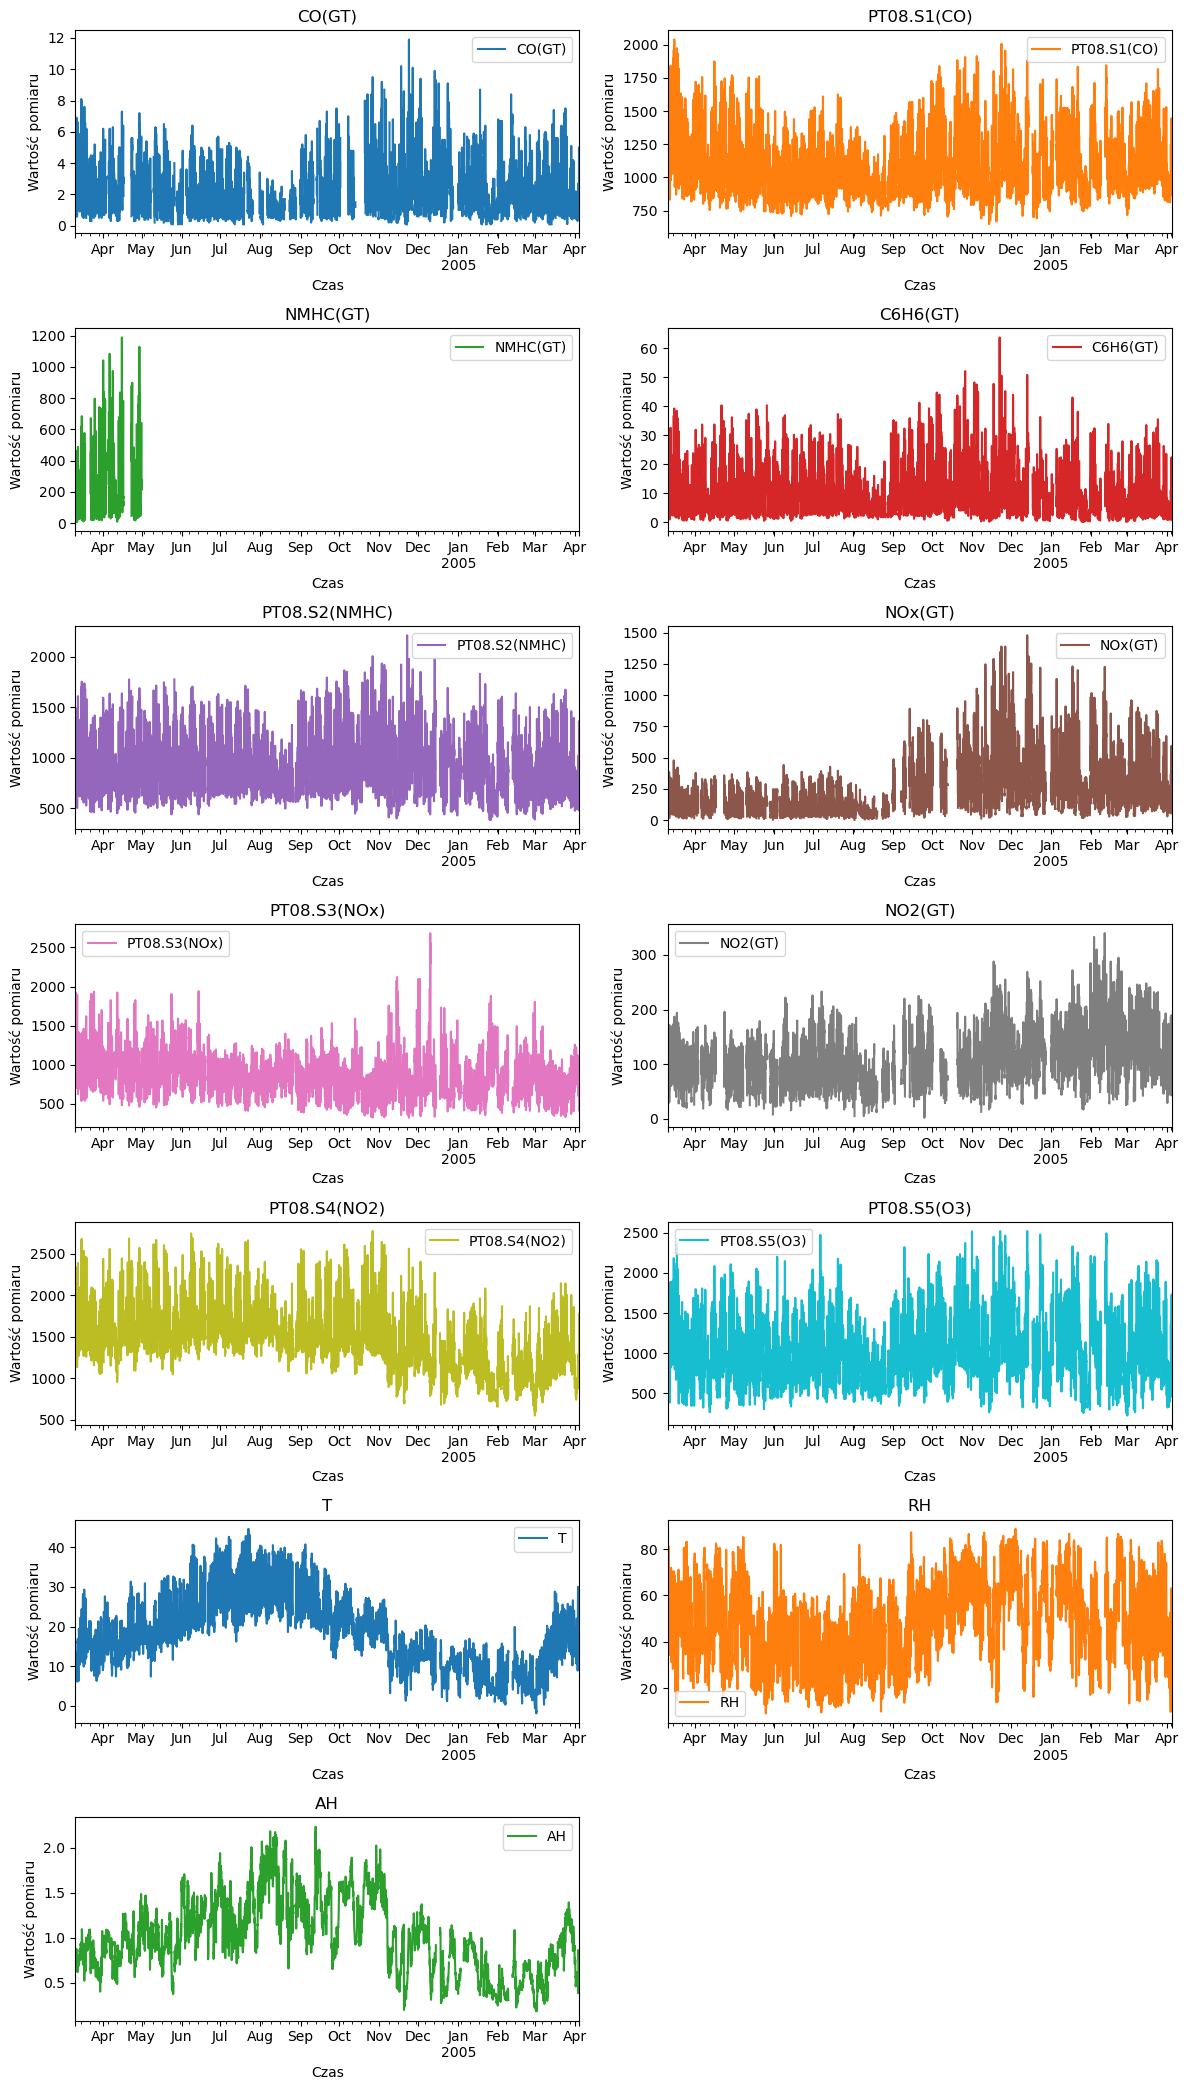

In [71]:
import matplotlib.pyplot as plt

cols = df1.columns.tolist()
n = len(cols)
ncols = 2
nrows = (n + ncols - 1) // ncols


axes = df1[cols].plot(
    subplots=True,
    layout=(nrows, ncols),
    figsize=(12, nrows * 3),
    sharex=False
)


for ax, col in zip(axes.flatten(), cols):
    ax.set_xlabel("Czas")                 
    ax.set_ylabel("Wartość pomiaru")       
    ax.set_title(col)                      

if nrows * ncols > n:
    for ax in axes.flatten()[n:]:
        fig = ax.get_figure()
        fig.delaxes(ax)

plt.tight_layout()
plt.show()


## Analiza każdej zmiennej z wykresu:

### 1. CO(GT)

* **Jednostka:** mg/m³
* **Trend:** wiosną (kwiecień–maj) niskie stężenia (\~1–4), latem lekkie podwyższenie (\~2–6), a od jesieni do zimy (październik–luty) wyraźny wzrost do 6–12 mg/m³. Wiosną następuje spadek z powrotem.
* **Sezonowość:** wyższe stężenia CO zimą (sprzyja inwersja, więcej spalania).

### 2. PT08.S1(CO)

* **Sygnał czujnika CO (jednostki ADC)**
* **Trend:** wzrost od wiosny (\~1000–1500) do jesieni/zimy (\~1250–2000), potem spadek wiosną kolejnego roku.
* **Zależność od T:** przy wyższej temperaturze (lato) odczyty są niższe, a przy chłodzie (zima) rosną.

### 3. NMHC(GT)

* **Węglowodory niezamierzone (µg/m³)**
* **Braki danych:** widoczny tylko „czysty” okres wiosenny, ponieważ nasze dane dla tej zmiennej były zbierane tylko do maja.

### 4. C6H6(GT)

* **Benzen (µg/m³)**
* **Trend:** względnie stabilne 5–25 wiosną/latem, skoki do 40–60 jesienią/zimą, spadek wiosną.

### 5. PT08.S2(NMHC)

* **Sygnał czujnika NMHC**
* **Trend:** podobny kształt jak NMHC(GT): najniższe wartości latem (\~700–1200), wyższe zimą (\~1000–2000).

### 6. NOx(GT)

* **Tlenki azotu (ppb)**
* **Trend:** do września umiarkowane \~0–400, następnie gwałtowny wzrost do 400–1400 w październiku–lutym, potem powrót do niższych poziomów.

### 7. PT08.S3(NOx)

* **Sygnał czujnika NOₓ**
* **Trend odwrotny do NOx(GT):** latem wysoki poziom sygnału (ok. 1500–2800), zimą spada (ok. 1200–2000). Wynika to z ujemnej korelacji sensora z temperaturą.

### 8. NO2(GT)

* **Dwutlenek azotu (µg/m³)**
* **Trend:** łagodny wzrost od wiosny (\~0–100) do zimy (\~100–300), z widocznymi skokami w miesiącach chłodnych.

### 9. PT08.S4(NO2)

* **Sygnał czujnika NO₂**
* **Trend:** latem wyższe sygnały (\~1500–2600), zimą nieco niższe (\~1000–2000) – odwrotnie niż mierzona wartość NO₂.

### 10. PT08.S5(O3)

* **Sygnał czujnika O₃**
* **Trend:** względnie stały, ale z lekkim obniżeniem zimą (przy niższym nasłonecznieniu) i podwyższeniem latem (\~1000–2500).

### 11. T (Temperatura, °C)

* **Trend sinusoidalny:** od \~5 °C w kwietniu do \~35 °C w lipcu–sierpniu, spadek do \~0 °C w styczniu i ponowny wzrost wiosną.

### 12. RH (Wilgotność względna, %)

* **Trend odwrotny do T:** wyższa RH zimą (\~40–80 %), niższa latem (\~20–60 %) – chłodne powietrze utrzymuje więcej wilgoci względnie.

### 13. AH (Wilgotność absolutna, g/m³)

* **Trend:** rośnie latem (\~1–2,2 g/m³), spada zimą (\~0,5–1,2 g/m³), co odzwierciedla fizyczny wzrost pojemności pary przy wyższej T.

---

**Kluczowe wnioski:**

* **Sezonowość** odczytów (gazy i czujniki) silnie związana z temperaturą: zimą stężenia zanieczyszczeń (CO, NOx, benzen) rosną, latem spadają.
* **Czujniki PT08.S1–PT08.S5** reagują odwrotnie lub zgodnie z mierzonymi gazami (np. PT08.S3 odwrotnie do NOx).
* **Wilgotność absolutna (AH)** rośnie/ maleje zgodnie z temperaturą, natomiast **wilgotność względna (RH)** wykazuje przeciwną do T tendencję.
* **Zauważalne duże skoki** stężeń w okresie jesienno-zimowym (możliwe źródła komunikacyjne + ogrzewanie).
